# Weeks 4 Exercises

Name: Kesav Adithya Venkidusamy <br>
Course: DSC550 - Data Mining <br>
Instructor: Brett Werner <br>

### Predicting Fuel Efficiency

In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. 

#### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [1]:
## Importing the libraries required for this assignment

import pandas as pd
import numpy as np

In [3]:
## Import the csv file having movie review data into dataframe

auto_df = pd.read_csv('auto-mpg.csv')

In [5]:
## Display few records in dataframe using head command

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
## Calculating total number of rows and columns using shape command

print("Total number of rows and columns: {}".format(auto_df.shape))

Total number of rows and columns: (398, 9)


#### 2. Begin by prepping the data for modeling:

1. Remove the car name column.
2. The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
3. Create dummy variables for the origin column

In [7]:
## Remove the car name column
auto_df = auto_df.drop('car name', 1)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
## Printing the column and dtypes

auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [10]:
## Printing info to display the column and dtypes

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [12]:
## Use to_numeric with errors = 'coerce' to fill strings with NaN

auto_df['horsepower'] = auto_df['horsepower'].apply(pd.to_numeric, errors='coerce')

## Find mean of column
mean = auto_df['horsepower'].mean()
print("The mean of horsepower: {}".format(mean))

## Replace all NA's in column with mean
auto_df['horsepower'] = auto_df['horsepower'].fillna(mean)

The mean of horsepower: 104.46938775510205


In [13]:
## Printing the column names and dtypes using info()

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [17]:
## Checking the distinct values for Origin column

auto_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [14]:
## Create dummy variables for the origin column.

auto_df['origin_1'] = auto_df['origin'].apply(lambda x: 1 if x == 1 else 0) # create origin_1 column that lists 1 if origin column is 1, otherwise origin_1 will be 0
auto_df['origin_2'] = auto_df['origin'].apply(lambda x: 1 if x == 2 else 0) # create origin_2 column that lists 1 if origin column is 2, otherwise origin_1 will be 0
auto_df['origin_3'] = auto_df['origin'].apply(lambda x: 1 if x == 3 else 0) # create origin_3 column that lists 1 if origin column is 3, otherwise origin_1 will be 0

In [15]:
## Printing the dataframe using head command

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


#### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

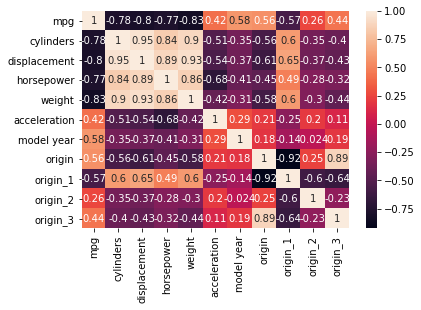

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix of the auto df and call is correlation_mat
correlation_matrix = auto_df.corr()

# using the correlation_mat above, create a visualization using a heatmap
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [21]:
## Printing the correlation matrix as well

correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


<b>Observation</b>

1. Highly negatively correlated: MPG and Weight, MPG and cylinders, MPG and displacement, MPG and horsepower. So, for increase in weight of the vehicle or number of cylinders or number of displacement or increase in horsepower, there will be a decrease in Mileage per Gallon

2. Highly positivitly correlated: Cylinders and Weight, Cylinders and Displacement, Displacement and Weight. Here, for increase in cylinders there will be increase in weight of the vehicle or increase in cylinders will increase the displacement.

#### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Text(0, 0.5, 'Vehicle Weight (lbs)')

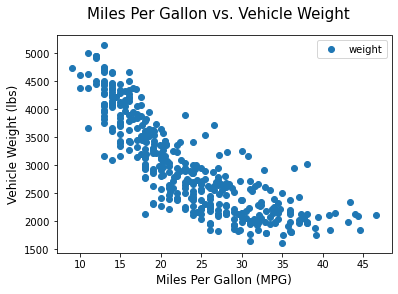

In [20]:
# Create a plot of mpg vs. weight

auto_df.plot(x='mpg', y='weight', style='o')
plt.suptitle('Miles Per Gallon vs. Vehicle Weight', fontsize=15)
plt.xlabel('Miles Per Gallon (MPG)', fontsize=12)
plt.ylabel('Vehicle Weight (lbs)', fontsize=12)

<b>Observation:</b>

From the grapth we could infer that increase in weight of the vehicle decrease the Miles Per Gallon (MPG), and lighter vehicles have higher MPG. Here, the relationship between MPG and vehicle weight is inversely related - as one goes up, and other goes down and vice versa. These results are in agreement with the correlation coefficient as MPG and Weight are highly negatively correlated.


#### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [22]:
## Import numpy and print the column names

import numpy as np
auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'origin_1', 'origin_2',
       'origin_3'],
      dtype='object')

In [28]:
# create new df with no mpg column

auto_df_nompg = auto_df.copy()
auto_df_nompg = auto_df_nompg.drop('mpg',1)
auto_df_nompg.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [29]:
## Printing few records in the dataframe

auto_df_nompg.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,1,0,0


In [30]:
## Importing train_test_split module from sklearn
## Split data into testing and training sets

from sklearn.model_selection import train_test_split

# Create x_train, x_test, y_train, y_test using train_test_split function with a test size of 20% (training is 80%)
x_train, x_test, y_train, y_test = train_test_split(auto_df_nompg, auto_df[['mpg']], test_size=.2)

In [31]:
## Test the shape to see if it matches the y_train shape rows

print("The shape of x training dataset: {}".format(x_train.shape))
print("The shape of y training dataset: {}".format(y_train.shape))

The shape of x training dataset: (318, 10)
The shape of y training dataset: (318, 1)


#### 6. Train an ordinary linear regression on the training data.

In [32]:
## import LinearRegression library

from sklearn.linear_model import LinearRegression

In [41]:
## Create Regression Model
model = LinearRegression()

## Train the model
model.fit(x_train, y_train)

## Use model to make predictions on test set
y_pred = model.predict(x_test)

#### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [36]:
## Importing required libraries from sklearn.metricc

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [37]:
## Printout Testing set relevant metrics

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Model Coefficients: [[-1.87277135e-01  1.45795459e-02 -1.18152633e-02 -6.53300518e-03
   1.06586092e-01  7.62840457e-01  9.10481813e-01 -9.09727614e-01
   9.08973415e-01  7.54199270e-04]]
Mean Absolute Error (MAE): 2.3548774785013755
Root Mean Squared Error (RMSE): 2.878462045816159
Coefficient of Determination (R2): 0.8515608379373032


<b>Observation:</b>

1. <b>Low MAE</b> value of 2.5 indicates that the forecast value is nearer to the true value
2. The <b>low RMSE</b> of 2.87 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
3. The <b>R2</b> value of 0.85 (85%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value

#### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

I have chosen <b>Ridge regression</b> and going to repeat the above steps

In [38]:
## Importing required libraries
from sklearn import linear_model

# train the model
ridge_r = linear_model.Ridge().fit(x_train, y_train)

# Use model to make predictions
y_pred_rgr = ridge_r.predict(x_test)

In [39]:
### Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
## Print relevant metrics for test data

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rgr))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_rgr)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_rgr))

Model Coefficients: [[-1.87277135e-01  1.45795459e-02 -1.18152633e-02 -6.53300518e-03
   1.06586092e-01  7.62840457e-01  9.10481813e-01 -9.09727614e-01
   9.08973415e-01  7.54199270e-04]]
Mean Absolute Error (MAE): 2.3554616597417404
Root Mean Squared Error (RMSE): 2.8791440086412017
Coefficient of Determination (R2): 0.8514904934405836


<b>Observation:</b>

1. The low MAE value of 2.355 indicates that the forecast value is nearer to the true values
2. The low RMSE of 2.87 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
3. The R2 value of 0.85 (85%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value
4. These metrics are almost identical to testing set metrics in linear regression

In [40]:
# Use model to make predictions on training set
y_pred_rgr_train = ridge_r.predict(x_train)

# Prining relevant metrics for training dataset
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_rgr_train)) #on average, how far away the predictions are from values
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_train, y_pred_rgr_train)))
print("Coefficient of Determination (R2):", r2_score(y_train, y_pred_rgr_train))


Mean Absolute Error (MAE): 2.5549165205491238
Root Mean Squared Error (RMSE): 3.3726246694393556
Coefficient of Determination (R2): 0.8168310994019996


<b>Observation:</b>

1. The low MAE value of 2.55 indicates that forecast value is near to true values
2. The low RMSE of 3.37 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
3. The R2 value of 0.816 (81.6%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value
4. These metrics are almost identical to training set metrics in linear regression